In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
image_paths = glob.glob('./camera_cal/*')
nimage_camera_cal = len(image_paths)
print('#image of camera calburation =', nimage_camera_cal)

#image of camera calburation = 20


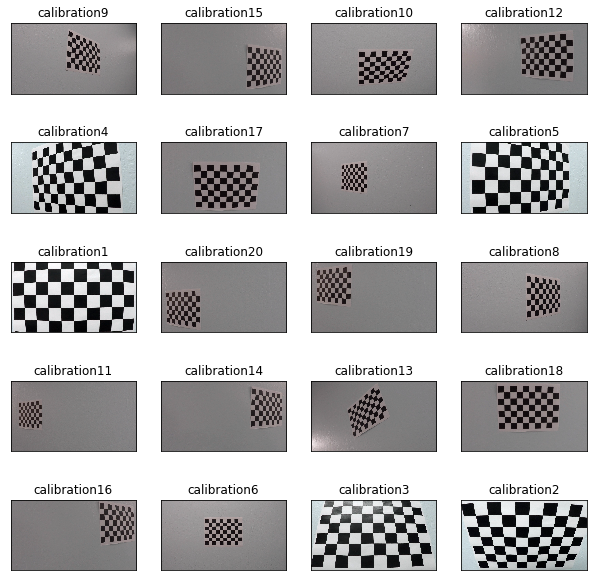

In [3]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 8))
for index, image_path in enumerate(image_paths):
    
    y_index = index // 4
    x_index = index % 4

    img = cv2.imread(image_path)
    
    axes[y_index, x_index].imshow(img)
    axes[y_index, x_index].set_title(image_path.split('/')[2].split('.')[0])
    axes[y_index, x_index].set_xticks([])
    axes[y_index, x_index].set_yticks([])
    
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

height= 720  width= 1280


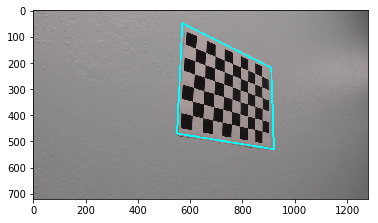

In [4]:
test_img = cv2.imread('./camera_cal/calibration9.jpg')
height, width = test_img.shape[:2]
print('height=', height, ' width=', width)

pts = np.array([[570,50], [550,470], [920,530], [910,220]], np.int32)
cv2.polylines(test_img, [pts], True, (0,255,255), thickness=5)

plt.imshow(test_img);

In [5]:
src = np.float32([[570, 50], [910, 220], [470, 530], [920, 530]])
dst = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

In [6]:
dst = np.float32([[70, 70], [width-70, 70], [0, height], [width-70, height-70]])

In [7]:
M = cv2.getPerspectiveTransform(src, dst)
test_img_warped = cv2.warpPerspective(test_img, M, dsize=(width, height))

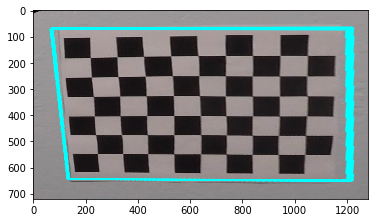

In [8]:
plt.imshow(test_img_warped)

In [9]:
nx = 9
ny = 6

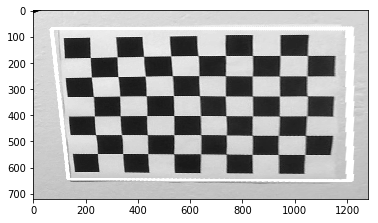

In [16]:
test_gray = cv2.cvtColor(test_img_warped, cv2.COLOR_RGB2GRAY)
plt.imshow(test_gray, cmap='gray')

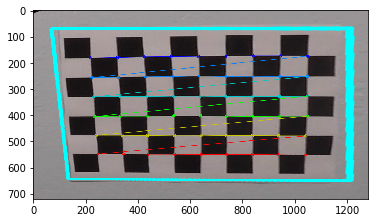

In [18]:
ret, corners = cv2.findChessboardCorners(test_gray, (nx, ny), None)

# 角を検出できれば
if ret:
    # 関数で取得した座標をもとに角を描画する
    cv2.drawChessboardCorners(test_img_warped, (nx, ny), corners, ret)
    plt.imshow(test_img_warped)

In [32]:
corners.shape

(54, 1, 2)

In [29]:
# オブジェクトの位置を格納する配列を用意しておく
objp = np.zeros((nx*ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:ny, 0:nx].T.reshape(-1, 2)

In [30]:
objpoints = [] # 3次元空間での座標
imgpoints = [] # 2次元空間での座標

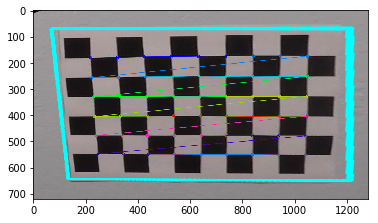

In [33]:
if ret:
    objpoints.append(objp)
    imgpoints.append(corners)
    
    cv2.drawChessboardCorners(test_img_warped, (ny, nx), corners, ret)
    plt.imshow(test_img_warped)

In [34]:
ret, mtx, dist, rvecs, tvecs = \
    cv2.calibrateCamera(objpoints, imgpoints, test_gray.shape[::-1], None, None)

In [39]:
dst = cv2.undistort(test_img_warped, mtx, dist, None, mtx)

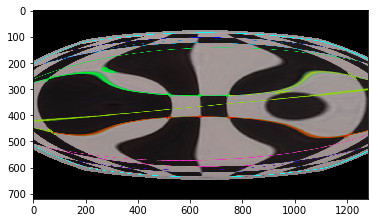

In [40]:
plt.imshow(dst)